### introduction
1. link of the data: https://www.kaggle.com/iabhishekofficial/mobile-price-classification?select=train.csv
2. here the basic aim is to: predict the price class of the a mobile phone i.e. classify the price class of a mobile.

### import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

pd.set_option('max_column', None) # --for displaying all columns
%config InlineBackend.figure_formats = ['svg'] # for clear matplotlib plots

### import data to python environment

In [2]:
df = pd.read_csv('train.csv')
display(df)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [3]:
df_test = pd.read_csv('test.csv')
display(df_test)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


### exploratory data analysis

In [4]:
column_name = []; unq = []; length = []
for i in df.columns:
    u = df[i].unique()
    column_name.append(i)
    unq.append(u)
    len_ = len(u)
    length.append(len_)

lot = list(zip(column_name, unq, length))
df_unq = pd.DataFrame(lot, columns=['column_name', 'unique_values', 'length'])
display(df_unq)

,column_name,unique_values,length
0,battery_power,"[842, 1021, 563, 615, 1821, 1859, 1954, 1445, ...",1094
1,blue,"[0, 1]",2
2,clock_speed,"[2.2, 0.5, 2.5, 1.2, 1.7, 0.6, 2.9, 2.8, 2.1, ...",26
3,dual_sim,"[0, 1]",2
4,fc,"[1, 0, 2, 13, 3, 4, 5, 7, 11, 12, 16, 6, 15, 8...",20
5,four_g,"[0, 1]",2
6,int_memory,"[7, 53, 41, 10, 44, 22, 24, 9, 33, 17, 52, 46,...",63
7,m_dep,"[0.6, 0.7, 0.9, 0.8, 0.1, 0.5, 1.0, 0.3, 0.4, ...",10
8,mobile_wt,"[188, 136, 145, 131, 141, 164, 139, 187, 174, ...",121
9,n_cores,"[2, 3, 5, 6, 1, 8, 4, 7]",8


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


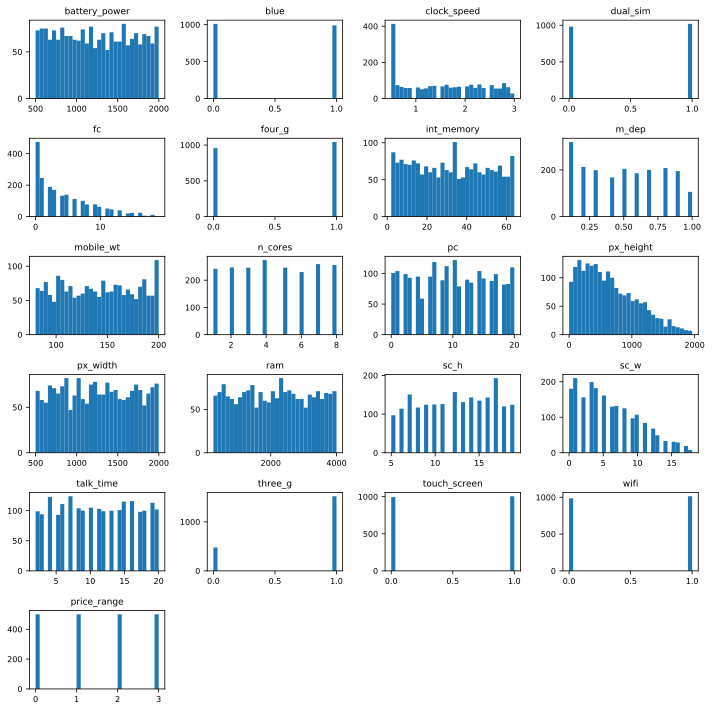

In [6]:
plt.figure(figsize=(10, 10))
for i in range(len(df.columns)):
    plt.subplot(6, 4, i+1)
    plt.hist(df[df.columns[i]], bins=30)
    plt.title(df.columns[i], fontsize=9)
    plt.xticks(fontsize=8); plt.yticks(fontsize=8) 
    
plt.tight_layout()
plt.show()

### train test spilt of the data

In [7]:
X = df.iloc[:, 0:20]; y = df.iloc[:, 20:21];
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=11)
print(len(X_train), len(y_train), len(X_test), len(y_test))

1500 1500 500 500


### scaling the data

In [8]:
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
model.fit(X_train)
X_train_scaled =  model.transform(X_train)
print(X_train_scaled)
print(X_train_scaled.shape)

[[-1.59854036 -0.98150435  1.05642528 ... -1.76981112  0.98938962
  -0.99733688]
 [-1.24383331  1.01884419  1.42451772 ... -1.76981112 -1.01072417
  -0.99733688]
 [-0.52759793 -0.98150435  1.54721519 ...  0.56503205  0.98938962
   1.00267023]
 ...
 [-1.15288279 -0.98150435  0.81103033 ...  0.56503205  0.98938962
   1.00267023]
 [-0.87548369  1.01884419  0.68833285 ...  0.56503205 -1.01072417
  -0.99733688]
 [-0.40254096  1.01884419  0.68833285 ...  0.56503205  0.98938962
   1.00267023]]
(1500, 20)


## making the same pipeline for test data

### scaling the test data

In [9]:
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
model.fit(X_test)
X_test_scaled =  model.transform(X_test)
print(X_test_scaled)
print(X_test_scaled.shape)

[[-1.41274455 -1.01613007  1.01458399 ...  0.54344897 -0.99203175
   0.93792284]
 [ 1.05170897 -1.01613007  1.38218689 ...  0.54344897  1.00803226
  -1.06618579]
 [-0.99209572 -1.01613007  0.4019125  ...  0.54344897 -0.99203175
  -1.06618579]
 ...
 [ 1.57523389 -1.01613007 -1.06849908 ...  0.54344897 -0.99203175
   0.93792284]
 [-0.01362994  0.98412598 -1.19103338 ...  0.54344897  1.00803226
   0.93792284]
 [-1.60477989  0.98412598  0.89204969 ...  0.54344897 -0.99203175
  -1.06618579]]
(500, 20)


## applying machine learning

here in this exaple each class is equally distributed, so our evaliation method is going to be 'accuracy score'

In [17]:
from sklearn.metrics import accuracy_score

### naive bayes

In [18]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.77


C:\Users\saisa\Anaconda3\envs\tf\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### knn

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=25)
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.586


C:\Users\saisa\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


### logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.958


C:\Users\saisa\Anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### svm

In [21]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, predictions)
print(accuracy)

C:\Users\saisa\Anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.866


### decision tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.786


### random forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, predictions)
print(accuracy)

C:\Users\saisa\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.86


from all the above machine learning models 'logistic regression' is performing well. hence the logistic regression model is selected.

## getting the prediction for the test data(here the data which class need to pe predicted)

### making the pipe line for the test data

In [33]:
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
model.fit(df_test.iloc[:, 1:22])
df_test_scaled =  model.transform(df_test.iloc[:, 1:22])
print(df_test_scaled)
print(df_test_scaled.shape)

[[-0.47545131  0.968496    0.31260069 ... -1.76021608  1.
  -1.01409939]
 [-0.94278218  0.968496   -1.25583195 ...  0.56811207 -1.
  -1.01409939]
 [ 1.29207729  0.968496    1.51908734 ... -1.76021608  1.
   0.98609664]
 ...
 [-0.1469316  -1.03252879 -0.16999397 ...  0.56811207 -1.
  -1.01409939]
 [ 0.65817305  0.968496   -1.25583195 ... -1.76021608  1.
  -1.01409939]
 [ 0.04971753  0.968496   -1.25583195 ...  0.56811207 -1.
   0.98609664]]
(1000, 20)


### training the final logistic regression model with the whole train data

### scaling the whole training data

In [26]:
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
model.fit(X)
X_scaled =  model.transform(X)
print(X_scaled)
print(X_scaled.shape)

[[-0.90259726 -0.9900495   0.83077942 ... -1.78686097 -1.00601811
   0.98609664]
 [-0.49513857  1.0100505  -1.2530642  ...  0.55964063  0.99401789
  -1.01409939]
 [-1.5376865   1.0100505  -1.2530642  ...  0.55964063  0.99401789
  -1.01409939]
 ...
 [ 1.53077336 -0.9900495  -0.76274805 ...  0.55964063  0.99401789
  -1.01409939]
 [ 0.62252745 -0.9900495  -0.76274805 ...  0.55964063  0.99401789
   0.98609664]
 [-1.65833069  1.0100505   0.58562134 ...  0.55964063  0.99401789
   0.98609664]]
(2000, 20)


In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)
predictions = model.predict(df_test_scaled)

print(predictions)

C:\Users\saisa\Anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\saisa\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0 0 0 3 3 0 0 3 3 0 3 0 3 0 0 3 0 0 0 0 0 3 3 3 3 0 3 3 3 3 0 0 0 0 0 3 3
 3 0 3 0 0 3 0 0 3 3 3 0 3 2 3 0 0 0 0 0 3 0 3 3 3 3 0 0 3 3 3 0 3 0 3 0 0
 0 0 3 0 0 3 0 3 3 0 0 0 0 0 3 3 3 3 3 0 0 3 0 0 3 3 3 3 3 3 3 0 3 3 3 0 3
 0 3 0 2 0 3 0 3 0 0 0 3 0 1 0 3 3 0 3 3 3 0 0 3 3 0 0 3 0 1 0 0 0 3 2 3 3
 0 1 0 3 3 0 0 3 3 3 3 3 3 0 3 3 3 3 3 3 3 0 3 3 0 3 2 3 3 3 3 3 0 0 3 3 0
 0 0 0 0 0 3 3 0 0 3 0 3 3 3 3 1 3 0 0 0 0 0 0 3 0 3 0 3 0 0 0 3 3 0 3 3 0
 0 3 0 2 0 0 3 3 0 0 0 0 3 0 0 3 3 2 0 0 3 3 0 3 0 3 0 0 3 0 0 0 0 3 0 0 3
 3 3 3 0 3 3 3 3 3 3 3 3 0 3 3 0 3 0 3 0 3 0 0 0 3 0 0 3 0 0 3 3 0 0 0 3 3
 0 3 3 0 0 0 3 3 0 0 0 0 0 3 2 0 3 0 3 0 0 3 0 3 0 2 3 3 0 0 3 0 3 3 0 0 0
 0 3 1 3 2 0 3 3 0 2 0 1 3 0 0 0 3 3 3 0 0 3 0 0 3 3 3 0 3 0 3 0 0 3 3 3 3
 3 0 0 3 0 3 3 3 0 3 0 0 0 3 0 0 3 3 3 0 3 3 0 0 0 3 0 1 0 3 3 0 0 3 0 3 3
 3 0 3 3 3 3 3 3 3 0 0 0 0 3 0 3 0 3 0 3 3 0 1 3 0 0 0 3 0 0 3 3 3 3 3 3 0
 0 0 3 0 3 3 2 0 0 3 0 0 3 3 0 3 0 3 0 0 0 0 0 3 0 3 3 0 0 3 0 3 3 0 0 0 3
 0 3 0 1 3 0 3 0 0 3 3 0 

### attaching the predictions to the test data

In [38]:
lot = list(zip(predictions))
df_answers = pd.DataFrame(lot, columns=['price_range'])
display(df_answers)

df_complete = pd.concat([df_test, df_answers], axis=1)
display(df_complete)

,price_range
0,0
1,0
2,0
3,3
4,3
...,...
995,0
996,0
997,3
998,0


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1,0
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0,0
996,997,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1,0
997,998,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0,3
998,999,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0,0


In [40]:
df_complete.to_csv('complete_answer.csv', index=False)